# Numerics 1: Homework 02

## Cooper Simpson

## Setup

In [2]:
import numpy as np
from decimal import *
from scipy.special import erf
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

### Root Finding Algorithms
The coded algorithms for the Bisection method and Newton's method are given here as they are used throughout the problems.

In [3]:
'''
Function: Bisection
Input:
    a: left end point guess
    b: right end point guess
    f: a callable function to find the root
    tol: tolerance for the root
    imax: max iterations
    info: whether to return number of iterations
Output:
    -the root within the tolerance
    -number of iterations to identify root (optional)
Errors:
    -if given function is not callable
    -if no identifiable root bounded by initial guesses
'''
def bisection(a, b, f, tol=1E-4, imax=1000, tab=False):
    #Check if f is callable
    if not callable(f):
        raise ValueError('Given function not callable')
    
    #Check if there is a zero
    if f(a)*f(b)>0:
        raise ValueError('Initial guesses do not bound a zero, \
                         or guesses are poor.')
    
    #Save iterates?
    if tab:
        iterates = []
        
    #Bisect
    for i in range(imax): #Stay under max iterations
        c = (a+b)/2 #Take the midpoint
        
        if tab:
            iterates.append(x_new)
        
        if f(c)==0 or (b-a)/2<tol: #Check to see if root is found
            if tab:
                return c, iterates
            return c

        if f(a)*f(c)<0: #Reset the interval
            b = c
        else:
            a = c
       
    #Something failed along the way
    raise ValueError('Maximum number of iterations exceeded.') 


'''
Function: Newton
Input:
    x0: the initial root guess
    f: a callable function for root finding
    df: a callable derivative of the function
    p: rate parameter for modified newtons method
    tol: minimum acceptable tolerance
    imax: maximum iterations
    tab: boolean to keep track of iterates or not
    error: (rel)ative or (abs)olute error quantification
    decimal: use Python decimal representation
Output:
    -The root estimate within the tolerance if successful
    -A tabulation of the root iterates
Errors:
    -If functions are not callable
    -If maximum number of iterations are exceeded
'''
def newton(x0, f, df, p=1, tol=1E-6, imax=1000, tab=False, error='rel', decimal=False):
    #Check if functions are callable
    if not callable(f) or not callable(df):
        raise ValueError('Function not callable')
    
    #Save iterates?
    if tab:
        E = []
        iterates = [x0]
        
    #Work with decimals?
    if decimal:
        x0 = Decimal(x0)
    
    #Iterate through max iterations
    for i in range(imax):
        x_new = x0 - p*f(x0)/df(x0) #New root estimate
        
        #Calculate an error
        if error=='rel': er = np.abs((x_new-x0)/x_new)
        elif error=='abs': er = np.abs(x_new-x0)
        else: ValueError('Invalid error type, \
                         must be (rel)ative or (abs)olute')
        
        if tab:
            E.append(er)
            iterates.append(x_new)
        
        #If successful return
        if er < tol:
            if tab:
                return x_new, E, iterates
            return x_new
        
        x0 = x_new

    raise ValueError('Max iterations exceeded')

## Problem 1

Determine which of the following iterations will converge to the fixed point $x_*$ provided $x_0$ is sufficiently close. If it does converge give the order, and if linear give the rate.

When considering these fixed point iterations we have to consider not only the fixed point method, but also Newton's method. This is because Newton's method is just a very specific version of fixed point iteration. 

### a). 
$x_{n+1} = -16 + 6x_n + \frac{12}{x_n},\:x_*=2$

Letting $g(x) = -16+6x+\frac{12}{x}$ we can see that $g$ is continuous around $x_*=2$. We will look at the value of the derivative at the fixed point.

$$ g'(x) = 6 - \frac{12}{x^2} \implies |g'(x_*)| = 3 > 1 $$

Thus we $\boxed{\text{cannot say}}$ that the iteration will converge to the fixed point.

### b).
$x_{n+1} = \frac{2}{3}x_n + \frac{1}{x_n^2},\:x_*=3^{1/3}$

Letting $g(x) = \frac{2}{3}x+\frac{1}{x^2}$ we can see that $g$ is continuous around $x_*=3^{1/3}$.

$$ g'(x) = \frac{2}{3} - \frac{2}{x^3} \implies |g'(x_*)| = 0 $$

Ah, so this requires more investigation. Let us see if we can write this in the form of Newton's method.

$$ x_{n+1} = \frac{2}{3}x_n + \frac{1}{x_n^2} = x_n - \frac{x_n}{3} + \frac{1}{x_n^2} = x_n + \frac{\frac{-x_n^3}{3}+1}{x^2} = x_n - \frac{f(x_n)}{f'(x_n)} $$

Where $f(x) = \frac{x^3}{3}-1$ and $f'(x) = x^2$

So this iteration is in fact Newton's method. Thus, because $f(x_*)=0$ and $f'(x_*)\neq0$ we will have at least $\boxed{\text{quadratic convergence}}$.

### c).
$x_{n+1} = \frac{12}{1+x_n},\:x_*=3$

Letting $g(x) = \frac{12}{1+x}$ we can see that $g$ is continuous around the fixed point. 

$$ g'(x) = -12(1+x)^{-2} \implies |g'(x_*)|=\frac{3}{4} $$

Thus we are guranteed $\boxed{\text{linear convergance}}$ for the iteration. The rate of this convergence is then given as $\boxed{\frac{3}{4}}$.

## Problem 2
Making some assumptions, we can model the temperature in the soil, $T(x,t)$, a distance $x$ meters below the surface and $t$ seconds after a cold snap with the following equation:

$$ \frac{T(x,t)-T_s}{T_i-T_s}=\text{erf}\Big (\frac{x}{2\sqrt{\alpha t}}\Big) $$

$T_s$ is the constant cold temperature after the snap, $T_i$ is the initial soil temperature, and $\alpha$ is thermal conductivity (m^2/s). The error function (erf) is given as...

$$ \text{erf}(t) = \frac{2}{\sqrt{\pi}}\int_0^te^{-s^2}ds $$

We will assume that $T_i=20$, $T_s=-15$, and $\alpha = 0.138\cdot10^{-16}$ -- with the temperatures all in degrees celsius.

In [4]:
T_i = 20
T_s = -15
alpha = 0.138E-6

eps = 1E-13 #Tolerance

### a).
We will determine the depth of a water main so that it only freezes after 60 days of exposure. To do this we recast as a root finding problem in the following manner:

As we are interested in the x dimension of the temperature at a certain time we will begin by isolating $T(x,t)$, and we will also plug in our temperature values.

$$ \implies T(x,t)=35\cdot\text{erf}\Big(\frac{x}{2\sqrt{\alpha t}}\Big)-15 $$

We can see that whether this function is positive or negative, and thus whether the ground is frozen or not, depends on the value of the error function. The error function is non-negative and saturates to one for non-negative arguments (i.e. $\text{erf}(0)=0$ and $\text{erf}(\infty)=1$). As $x$ increases the function will move towards one and as $t$ increases it will move towards zero. Plugging in our specified time (60 days) we can look for the root of $T(x)=0$ and be sure that for $x$ greater than the root the ground will not be frozen.

Converting our days to seconds we have...

$$ 60d \cdot \frac{24h}{1d} \cdot \frac{60m}{1h} \cdot \frac{60s}{1m} = 60^3\cdot24 = 5.184\cdot10^6 = \bar{t} $$

Thus our root finding problem is for $f(x)=T(x,\bar{t})=0$ giving us our function and its derivative as follows.

$$ f(x)=T(x,\bar{t})=35\cdot\text{erf}\Big(\frac{x}{2\sqrt{\alpha\bar{t}}}\Big)-15 $$

$$ f'(x)=T'(x,\bar{t})=\frac{35}{\sqrt{\alpha\bar{t}\pi}}\text{exp}(-\Big(\frac{x}{2\sqrt{\alpha\bar{t}}}\Big)^2) $$

Which follows from the chain rule on the derivative of the error function and the Fundamental Theorem of Calculus. Because the function saturates quite fast we will look at our function on the interval $[0,5]$ to ensure that $f(5)>0$.

In [5]:
t_bar = 5.148E6

def f(x, t=t_bar, a=alpha):
    return 35*erf(x/(2*np.sqrt(alpha*t)))-15

def df(x, t=t_bar, a=alpha):
    return (35/(np.sqrt(alpha*t*np.pi))) * \
            np.exp(-(x/(2*np.sqrt(alpha*t)))**2)

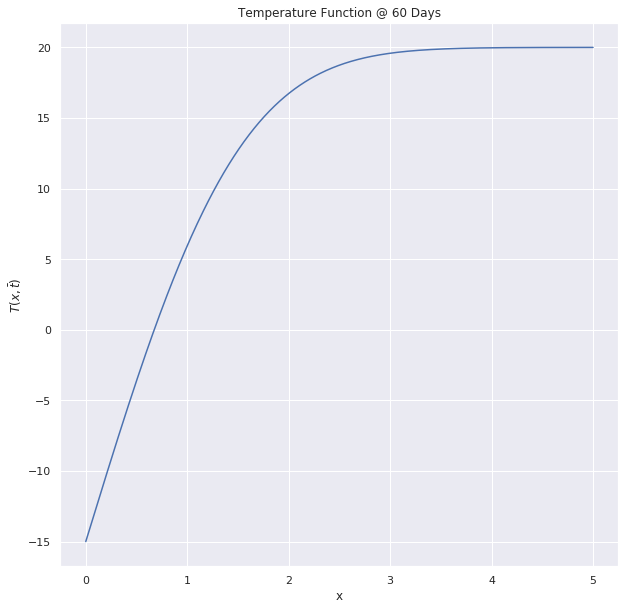

In [6]:
x_bar = 5
dx = 0.01
x = np.arange(0,x_bar+dx,dx)

fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(x, f(x))
ax.set_title('Temperature Function @ 60 Days')
ax.set_xlabel('x')
ax.set_ylabel(r'$T(x,\bar{t})$');

### b).
Using the Bisection method we will solve our root finding problem described above.

In [7]:
a0 = 0
b0 = 5

p_b = bisection(a0, b0, f, tol=eps)
print('Root @ x=%.4f meters' % p_b)

Root @ x=0.6746 meters


### c).
We will solve our root finding problem using Newton's method.

First, with our initial guess as $x_0=0.01$

In [8]:
x0 = 0.01

p_n = newton(x0, f, df, tol=eps)
print('Root @ x=%.4f meters' % p_n)

Root @ x=0.6746 meters


Next, with our initial guess as $x_0=\bar{x}=5$

In [9]:
p_n = newton(5, f, df, tol=eps)
print('Root @ x=%.4f meters' % p_n)

/home/rs-coop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in double_scalars
/home/rs-coop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in double_scalars
/home/rs-coop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in double_scalars


ValueError: Max iterations exceeded

Using our initial guess as $x_0=\bar{x}=5$ we can see in the above error output that the maximum number of iterations are exceeded, and that there are some issues with the numerical values. This is because the derivative at the starting location is essentially zero. Even if the guess had been slightly less than 5, if the derivative is too small then the iterates explode and break the method.

Using both Bisection and Newton's method we determined that the water main should be buried at least $\boxed{0.6746\;\text{meters}}$ beneath the surface of the ground.

My preferred method is Bisection. This is because it works just as well as Newtons in terms of speed and accuracy (in practice here), doesn't require computing a derivative, and won't break as long as you provide mildly resonable guesses.

## Problem 3
Here we will consider applying Newton's method to a real cubic polynomial.

### a).
We will assume that the polynomial has three distinct roots ($x=\alpha,\; x=\beta,\;x=\gamma$) and show the guess $x_0=\frac{1}{2}(\alpha+\beta)$ will converge to $x=\gamma$ in a single step.

Because our function is assumed to have these three roots we can write $f(x) = (x-\alpha)(x-\beta)(x-\gamma)$. The Newton iteration equation requires us to find the derivative of the function, so we will start there.

$$
\begin{align}
    &f'(x) = [(x-\alpha)+(x-\beta)](x-\gamma)+(x-\alpha)(x-\beta)\\
    &=(2x-\alpha-\beta)(x-\gamma)+(x-\alpha)(x-\beta)
\end{align}
$$

We are trying to show that $\gamma = x_0 - \frac{f(x_0)}{f'(x_0)}$, so we will plug in and see what happens.

$$
\begin{align}
    &f(x_0) = \frac{1}{2}(\beta-\alpha)\frac{1}{2}(\alpha-\beta)\frac{1}{2}(\alpha+\beta-\gamma)\\
    &=\frac{-1}{8}(\alpha-\beta)^2(\alpha+\beta-2\gamma)\\
    &~\\
    &f'(x_0) = 0 - \frac{1}{4}(\alpha-\beta)^2
\end{align}
$$

Putting this all together:

$$ \frac{1}{2}(\alpha+\beta)-\frac{\frac{-1}{8}(\alpha-\beta)^2(\alpha+\beta-2\gamma)}{- \frac{1}{4}(\alpha-\beta)^2} = \frac{1}{2}(\alpha+\beta) - \frac{1}{2}(\alpha+\beta-2\gamma) = \gamma $$

Thus we see that this initial guess will yield the root $\gamma$ in a single step.

### b).
If we assume that two roots coincide (i.e. are equal) with the third distinct, then we can show that there is exactly one starting guess that is not the root iteself for which Newton's method will fail.

Let us plot an example of this just to get an idea of what we are looking at. We will use the function $f(x)=(x-2)^2(x-5)$.

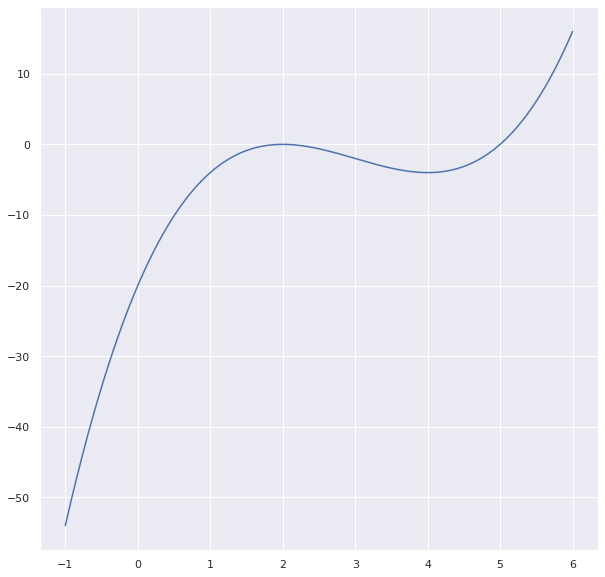

In [10]:
x = np.arange(-1,6+0.001,0.001)
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(x, (x-5)*(x-2)**2);

Any cubic polynomial will have a shape roughly similar to this. Maybe the function will be odd in the opposite manner (i.e. positive at $-\infty$), or have higher peaks and steeper valleys, but the general shape remains. This eliminates any risk of the function shooting off to infinity. It may take a while for some guesses to converge, but in the end they will. Our only problems will occur when the derivative is zero at an iterate. This can happen at the double root and at one other place. Specifically, if the double root is $x=r$ and the other root is $x=\alpha$, then $f'(\frac{2\alpha+r}{3})=0$. 

The important thing to note is that the only way to get to this point (which we will call $x_0$) is by having it as your initial guess. If the initial guess is anywhere else then no iteration will ever result in $x_0$ where the derivative is zero, and thus the method will converge to a root. Geometrically this makes sense because the only place on a cubic polynomial where the tangent line would intersect the x-axis at $x_0$ is near the other peak. In this case the other peak is also a root and so this cannot happen because the peak is not above the x-axis.

Looking at our example above, we can see that no matter where we draw a tangent line, it will not intersect the x-axis where the derivative is zero.

Thus we can conclude that the only other initial guess that results in Newton's method failing is the point exactly where the derivative is zero (and not a root).

### c).
Extending part b). we can show why there are infinitely many starting guess for which Newton's method will fail when all three roots are distinct.

Again we will plot an example function ($f(x)=(x-2)(x-5)(x+1)$) to help aid our understanding.

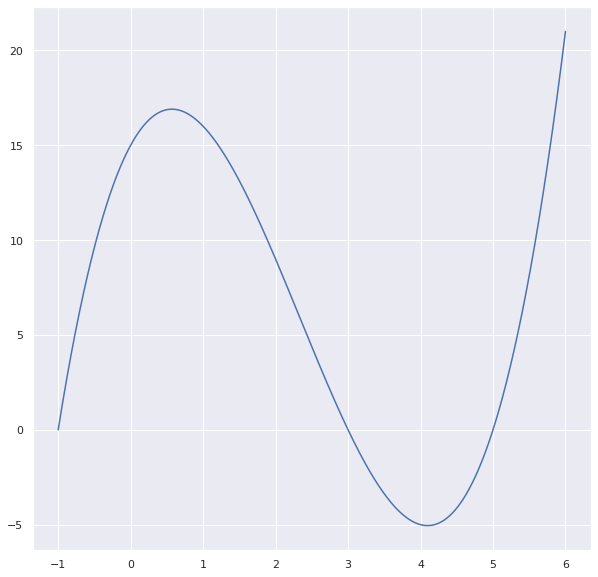

In [17]:
x = np.arange(-1,6+0.001,0.001)
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(x, (x-5)*(x-3)*(x+1));

In the previous part where one of the roots had multiplicity of two we concluded that there was no way for Newton to fail unless you started at a point where the derivative was zero. However, in this case where all of the roots are distinct, it is now possible to reach a point where the derivative is zero from a perfectly acceptable previous point. This is because, geometrically, a tangent line from one of the peaks (around where the derivative is zero) can now intersect the x-axis where the other peak is exactly. Essentially, in one iteration you can go from near one peak to the x location where the derivative is zero on the adjacent peak. Furthermore, there are infinitely many ways to get here even if some of the iterations take longer. Because one of the peaks is no longer also a root it allows for iterations to reach these places of a zero derivative and thus Newton can fail for infinitely many starting points.

## Problem 4
We will assume $f(x)=(x-x_*)^pq(x)$ with $p$ a positive integer, $q$ twice continuously differentiable, and $q(x_*)\neq0$. We note that $f'(x_*)=0$ and we will use the following notation: $x_k,\;f_k=f(x_k),\;e_k=|x_*-x_k|$.

### a).
We will show that Newton's method converges linearly for $f(x)$.

We will begin by finding the derivative of our function $f(x)$.

$$ f'(x) = p(x-x_*)^{p-1}q(x) + (x-x_*)^pq'(x) $$

Plugging this and the function into the Newton iteration equation we have the following:

$$
\begin{align}
    &x_{n+1} = x_n - \frac{(x_n-x_*)^pq(x_n)}{p(x_n-x_*)^{p-1}q(x_n) + (x_n-x_*)^pq'(x_n)}\\
    &~\\
    &\text{Subtracting the root }\implies x_{n+1}-x_* = x_n-x_* - \frac{(x_n-x_*)^pq(x_n)}{p(x_n-x_*)^{p-1}q(x_n) + (x_n-x_*)^pq'(x_n)}\\
    &~\\
    &\implies x_{n+1}-x_* = x_n-x_*(1-\frac{(x_n-x_*)^{p-1}q(x_n)}{p(x_n-x_*)^{p-1}q(x_n) + (x_n-x_*)^pq'(x_n)})\\
    &~\\
    &\implies \frac{x_{n+1}-x_*}{x_n-x_*} = \frac{(p-1)q(x_n)+(x_n-x_*)q'(x_n)}{pq(x_n)+(x_n-x_*)q'(x_n)}\\
    &~\\
    &\text{Apply absolute values, take the limit, and assume the sequence converges...}\\
    &\lim_{n\to\infty} \frac{|x_{n+1}-x_*|}{|x_n-x_*|} = \boxed{\lim_{n\to\infty} \frac{e_{k+1}}{e_k} = \frac{p-1}{p}}
\end{align}
$$

Where the last lines follows because $x_n\to x_*$ by assumption. We can see that we have linear convergence in the case where we have a higher multiplicity of roots,

### b).
The modified Newton's method with a rate parameter is given as follows:

$$ x_{k+1} = x_k - p\frac{f_k}{f'_k} $$

We will show that if $x_k\to x_*$ then the rate of convergence is quadratic (i.e. $|e_{k+1}|\leq C|e_k|^2$ where $C$ is constant).

The process is quite similar to that shown above just with an extra multiple of p somewhere inside. Specifically, instead of the $(p-1)$ term we see in the line right before we take the limit, we will have a $(p-p)=0$ term. This gives us the following:

$$
\begin{align}
    &\frac{x_{n+1}-x_*}{x_n-x_*} = \frac{(x_n-x_*)q'(x_n)}{pq(x_n)+(x_n-x_*)q'(x_n)}\\
    &~\\
    &\implies \frac{x_{n+1}-x_*}{(x_n-x_*)^2} = \frac{q'(x_n)}{pq(x_n)+(x_n-x_*)q'(x_n)}\\
    &\text{Apply absolute values, take the limit, and assume the sequence converges...}\\
    &\lim_{n\to\infty} \frac{|x_{n+1}-x_*|}{|x_n-x_*|^2} = \boxed{\lim_{n\to\infty} \frac{e_{k+1}}{e_k^2} = \frac{q'(x_*)}{q(x_*)p}}
\end{align}
$$

Again, the last line follows because we are assuming that $x_n\to x_*$. Further, we may note that by assumption $q(x_*)\neq0$ and $q'(x_*)$ exists. Thus we can let $C=\frac{q'(x_*)}{q(x_*)p}$, and we have shown that the rate of convergence is quadratic.

### c).
Note the code for Newton's and Modified Newton's method are given at the beginning of this work.

We will apply these methods to the following function:

$$ f(x) = (x-1)^5e^x $$

In [10]:
x0 = 0 #Initial guess
tol = 1E-15 #Relative error tolerance

def f(x):
    return ((x-1)**5)*np.exp(x)

def df(x):
    return (x+4)*np.exp(x)*(x-1)**4

In [11]:
r1, _, i1 = newton(x0, f, df, tol=tol, tab=True, decimal=True)
i1 = np.array(i1, dtype='float64')

r2, _, i2 = newton(x0, f, df, p=5, tol=tol, tab=True, decimal=True)
i2 = np.array(i2, dtype='float64')

In [12]:
pd.options.display.float_format = '{:.15E}'.format

df_1 = pd.DataFrame({'Iteration': [i for i in range(len(i1))],
                     'Iterate': i1,
                     'Error': np.abs(i1-1)}).set_index('Iteration')

df_2 = pd.DataFrame({'Iteration': [i for i in range(len(i2))],
                     'Iterate': i2,
                     'Error': np.abs(i2-1)}).set_index('Iteration')

With traditional Newton's method.

In [13]:
display(pd.concat([df_1.iloc[::5,:], df_1.iloc[-2:,:]]))

,Iterate,Error
Iteration,,
0,0.000000000000000E+00,1.000000000000000E+00
5,7.279472249514199E-01,2.720527750485801E-01
10,9.149462812517818E-01,8.505371874821821E-02
15,9.725285627331187E-01,2.747143726688128E-02
20,9.910397429641807E-01,8.960257035819263E-03
25,9.970683254984478E-01,2.931674501552184E-03
30,9.990398222884037E-01,9.601777115962884E-04
35,9.996854197455141E-01,3.145802544859411E-04
40,9.998969237926445E-01,1.030762073555014E-04


With Modified Newtons

In [14]:
display(df_2)

,Iterate,Error
Iteration,,
0,0.000000000000000E+00,1.000000000000000E+00
1,1.250000000000000E+00,2.500000000000000E-01
2,1.011904761904762E+00,1.190476190476186E-02
3,1.000028277344192E+00,2.827734419175165E-05
4,1.000000000159921E+00,1.599207433145011E-10
5,1.000000000000000E+00,0.000000000000000E+00
6,1.000000000000000E+00,0.000000000000000E+00


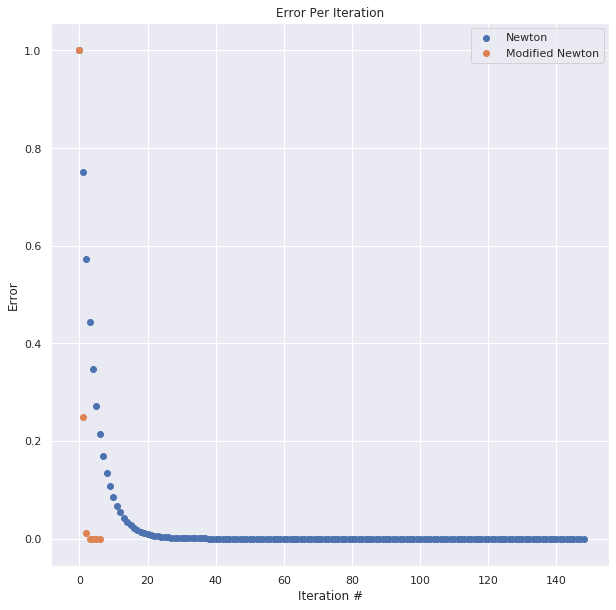

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.scatter(df_1.index, df_1.Error)
ax.scatter(df_2.index, df_2.Error)
ax.set_title('Error Per Iteration')
ax.set_xlabel('Iteration #')
ax.set_ylabel('Error')
ax.legend(['Newton', 'Modified Newton']);

In the previous part of this problem we showed that without the rate parameter in the Modfied Newton's method the convergence would be linear due to the multiplicity of the root. We can clearly see that in action here, both in the plot above and in the tables. For the standard Newton's method it took almost 150 iterations to converge on the root to our desired accuracy. The modified method achieved this same goal in only 6 iterations. This is what we would expect given our theory development (that the modified would be faster), although we do see some variation in the specifics. In particular we see that the standard Newton's method is performing potentially better than expected, but still poorly.

## Problem 5
Letting $x_0,\;x_1$ be two succesive points from a secant iteration scheme applied to the equation $f(x)=0$ with $f_0=f(x_0),\;f_1=f(x_1)$. We will show that the order of the points (i.e. which one is the most "recent") has no effect on value of the next point.

In the Secant method the recurrence equation is as follows:

$$ x_{n+1} = x_n - \frac{f(x_n)(x_n-x_{n-1})}{f(x_n)-f(x_{n-1})} $$

We will show that swapping $x_n$ and $x_{n-1}$ has no effect on $x_{n+1}$.

$$
\begin{align}
    &\text{Let } y_1 = x_1 - \frac{f_1(x_1-x_0)}{f_1-f_0}\\
    &\text{Let } y_0 = x_0 - \frac{f_0(x_0-x_1)}{f_0-f_1}\\
    &y_1-y_0 = x_1-x_0 - \frac{f_1(x_1-x_0)}{f_1-f_0} + \frac{f_0(x_0-x_1)}{f_0-f_1}\\
    &\implies y_1-y_0 = x_1-x_0 + \frac{(f_0-f_1)(x_0-x_1)}{f_0-f_1} = 0
\end{align}
$$

Thus we conclude that $y_0=y_1$ and are the same point no matter which of the previous points we consider the most recent.